# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Importing Data

In [5]:
# Creating a string of the path
# Define the path variable
path = r'/Users/douniaelyoussoufi/Climate Change Impact on Agriculture'
# Load the dataset file directly using os.path.join
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned.csv'))

# 1. Exploring Relationships

## a. Correlation Matrix

In [7]:
# Create a correlation matrix using pandas
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Unnamed: 0,year,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,irrigation_access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,economic_impact_million_usd
Unnamed: 0,1.000000,-0.005192,0.003236,0.006103,0.006974,-0.009335,0.005528,0.008221,0.001618,-0.009561,0.003912,-0.009074
year,-0.005192,1.000000,-0.004583,0.006551,-0.005461,0.010734,-0.002726,0.000938,-0.004332,0.013132,-0.006294,0.012419
average_temperature_c,0.003236,-0.004583,1.000000,0.007213,-0.003052,0.263781,-0.016808,-0.013268,0.005764,-0.014725,-0.010841,0.195827
total_precipitation_mm,0.006103,0.006551,0.007213,1.000000,-0.008681,0.029728,0.004360,-0.007580,0.011198,-0.026356,-0.021621,0.020966
co2_emissions_mt,0.006974,-0.005461,-0.003052,-0.008681,1.000000,-0.089868,0.001255,0.002995,0.015243,-0.020275,0.004518,-0.057035
crop_yield_mt_per_ha,-0.009335,0.010734,0.263781,0.029728,-0.089868,1.000000,-0.005094,-0.000255,-0.004035,0.006423,-0.005692,0.726358
extreme_weather_events,0.005528,-0.002726,-0.016808,0.004360,0.001255,-0.005094,1.000000,-0.012051,0.010497,0.014754,0.016266,-0.004526
irrigation_access_%,0.008221,0.000938,-0.013268,-0.007580,0.002995,-0.000255,-0.012051,1.000000,-0.004588,0.008314,0.001652,0.003988
pesticide_use_kg_per_ha,0.001618,-0.004332,0.005764,0.011198,0.015243,-0.004035,0.010497,-0.004588,1.000000,-0.015429,0.012447,-0.007796
fertilizer_use_kg_per_ha,-0.009561,0.013132,-0.014725,-0.026356,-0.020275,0.006423,0.014754,0.008314,-0.015429,1.000000,-0.000125,0.010743


## b. Correlation Matrix Heatmap

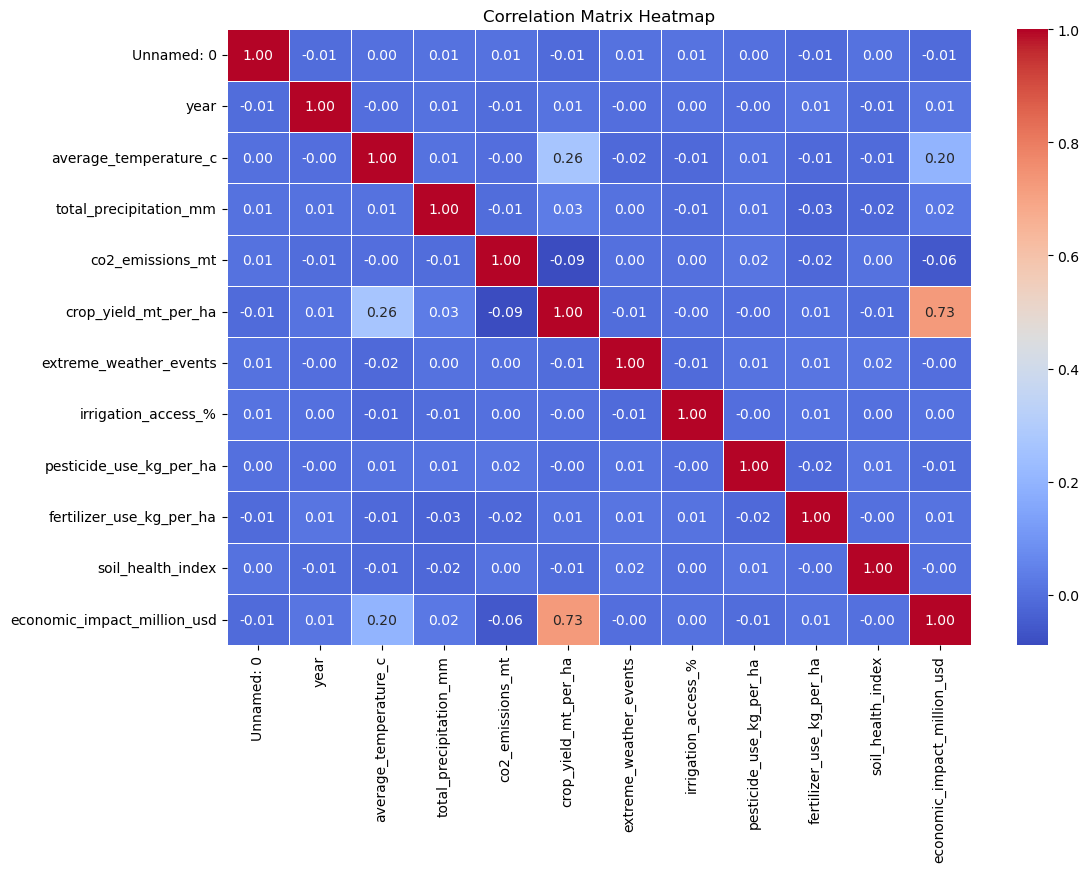

In [31]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)
# Create the figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the heatmap on the defined axis
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
# Set title
ax.set_title('Correlation Matrix Heatmap')
# Save the plot to the specified path
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation_matrix_heatmap.png'),
            dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## c. Results

In this analysis, I performed a correlation matrix to identify the most relevant columns. 
I decided to keep the columns `average_temperature_c`, `co2_emissions_mt`, `crop_yield_mt_per_ha`, 
`extreme_weather_events`, and `economic_impact_million_usd` due to their significant correlations. 
Columns like `total_precipitation_mm`, `irrigation_access_%`, `pesticide_use_kg_per_ha`, 
`fertilizer_use_kg_per_ha`, and `soil_health_index` should be dropped as they showed little to no correlation, 
and thus, they don't contribute meaningfully to the analysis.

In [54]:
# The columns to drop based on correlation matrix and relevance
columns_to_drop = ['total_precipitation_mm', 'irrigation_access_%', 
                   'pesticide_use_kg_per_ha', 'fertilizer_use_kg_per_ha', 
                   'soil_health_index']
# Dropping the unnecessary columns
df.drop(columns=columns_to_drop, inplace=True)
# Check the remaining columns after the drop
df.head()

,Unnamed: 0,year,country,region,crop_type,average_temperature_c,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,adaptation_strategies,economic_impact_million_usd
0,0,2001,India,West Bengal,Corn,1.55,15.22,1.737,8,Water Management,808.13
1,1,2024,China,North,Corn,3.23,29.82,1.737,8,Crop Rotation,616.22
2,2,2001,France,Ile-de-France,Wheat,21.11,25.75,1.719,5,Water Management,796.96
3,3,2001,Canada,Prairies,Coffee,27.85,13.91,3.890,5,No Adaptation,790.32
4,4,1998,India,Tamil Nadu,Sugarcane,2.19,11.81,1.080,9,Crop Rotation,401.72


# 2. Scatter Plots of Strongest Correlations

## a. crop_yield_mt_per_ha vs economic_impact_million_usd

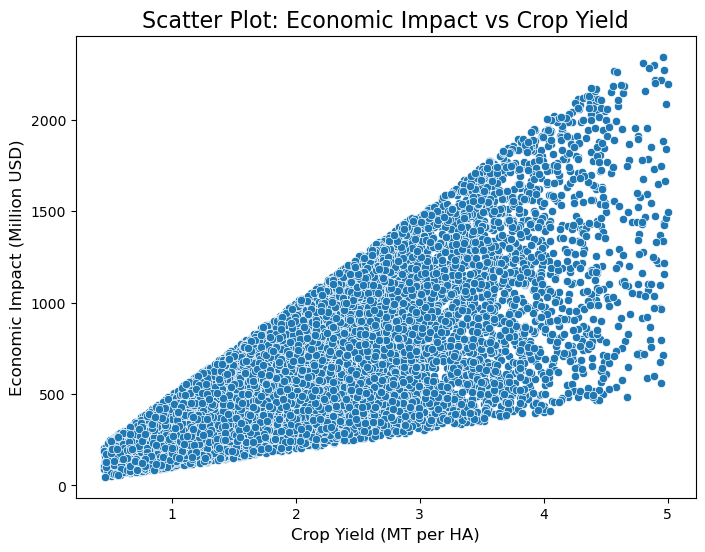

In [33]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='crop_yield_mt_per_ha', y='economic_impact_million_usd', data=df)

# Adding titles and labels
plt.title('Scatter Plot: Economic Impact vs Crop Yield', fontsize=16)
plt.xlabel('Crop Yield (MT per HA)', fontsize=12)
plt.ylabel('Economic Impact (Million USD)', fontsize=12)

# Save the plot to the specified path
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Economic_impact_vc_crop_yield'))
# Show the plot
plt.show()

### Key Finding: Strong Correlation Between Crop Yield and Economic Impact

A strong positive correlation (**0.726**) was found between `crop_yield_mt_per_ha` and `economic_impact_million_usd`. 

→ This suggests that crop yield plays a major role in determining the economic impact of agriculture.  
→ Higher yields are generally associated with higher economic returns.  
→ This relationship is worth exploring further with visualizations and potentially predictive modeling.

## b. average_temperature_c vs crop_yield_mt_per_ha

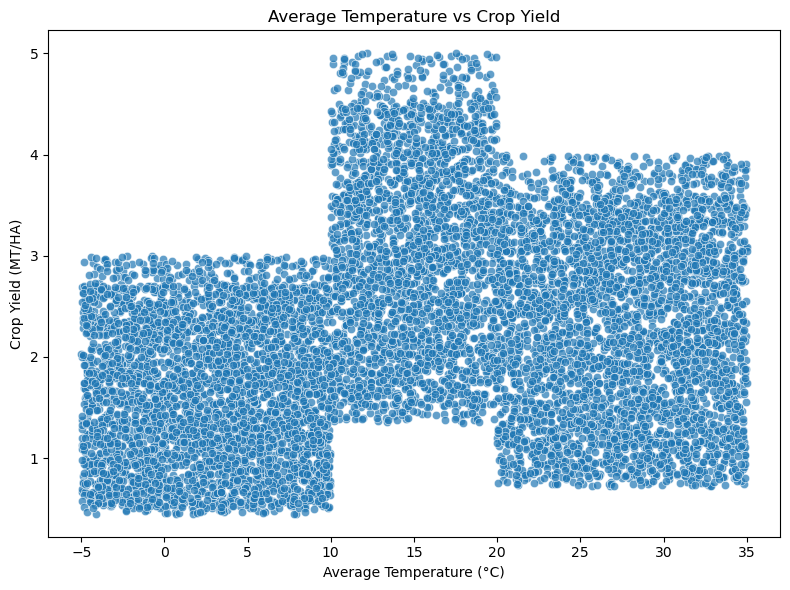

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='average_temperature_c', y='crop_yield_mt_per_ha', alpha=0.7)
plt.title('Average Temperature vs Crop Yield')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Crop Yield (MT/HA)')
plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Average_temp_vc_crop'))
# Show the plot
plt.show()

### Key Findings: Moderate Correlation

The correlation between `average_temperature_c` and `crop_yield_mt_per_ha` is **moderate (0.26)**, indicating a weak positive trend overall.

However, the scatter plot reveals **three clear clusters** based on temperature zones:

1. **Cold Regions (-5°C to 10°C):**  
   - Crop yield ranges from **0 to 3 MT/HA**.

2. **Moderate Regions (10°C to 20°C):**  
   - Crop yield ranges from **1.5 to 5 MT/HA** — the **highest yield range**.  
   - Indicates **optimal conditions** for crop growth.

3. **Hot Regions (20°C to 35°C):**  
   - Crop yield ranges from **0.5 to 4 MT/HA**, with **greater variability** and slightly lower averages.

This suggests that **regions with moderate temperatures** tend to have the **best agricultural productivity**, while colder and hotter regions may face limitations in yield.
→ A segmented or cluster-based analysis may be more appropriate than a simple linear model.

## c. average_temperature_c vs economic_impact_million_usd

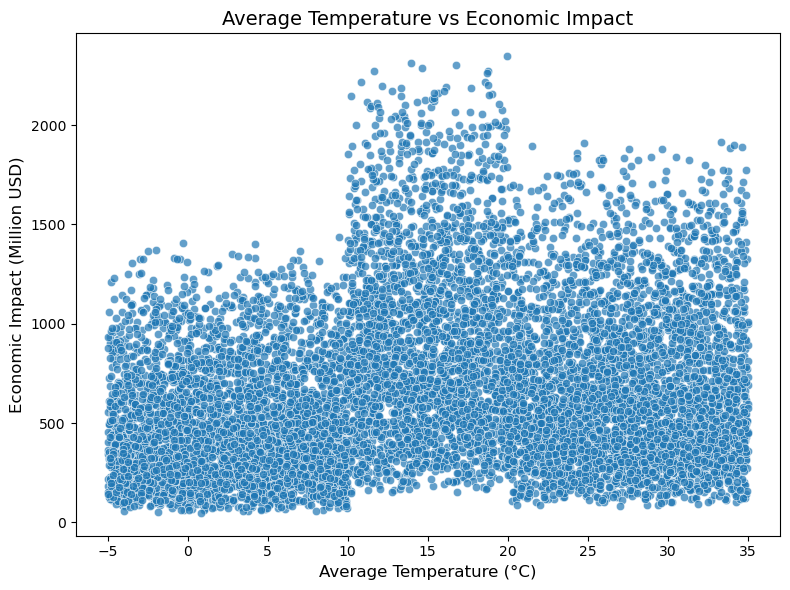

In [37]:
# Set the figure size
plt.figure(figsize=(8, 6))
# Create the scatter plot
sns.scatterplot(data=df, x='average_temperature_c', y='economic_impact_million_usd', alpha=0.7)
# Add title and labels
plt.title('Average Temperature vs Economic Impact', fontsize=14)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Economic Impact (Million USD)', fontsize=12)
# Adjust layout for better display
plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Average_temp_vc_economic_impact'))
# Show the plot
plt.show()

### Key findings: Moderate Correlation

The correlation between `average_temperature_c` and `economic_impact_million_usd` is **0.20**, indicating a **weak positive correlation**.

The scatter plot reveals **three distinct clusters** of data points based on temperature:

1. **First Cluster (Lower Temperatures):**  
   - This cluster corresponds to regions with **lower temperatures**. Economic impact within this cluster shows a varied range, but there is no strong trend.

2. **Second Cluster (Moderate Temperatures):**  
   - A larger concentration of points falls within **moderate temperature** regions, where there is a noticeable **increase in economic impact** as the temperature rises.

3. **Third Cluster (Higher Temperatures):**  
   - Data points in this cluster represent **hotter regions**, with economic impact values showing a mix of **moderate to higher values**, but the relationship between temperature and economic impact becomes less clear.

This suggests that **moderate temperatures** may be associated with a **higher economic impact**, though the weak correlation indicates other factors also play a role in influencing these results.  
→ Factors such as crop types is likely contributing to the variation in economic impact.

## d. Results

## Insight: Temperature's Influence on Economic Impact and Crop Yield

Based on the analysis, we observe that **moderate temperatures** tend to **increase both economic impact and crop yield**. This pattern explains the **strong correlation** between crop yield and economic impact, as both are positively influenced by moderate temperatures.

- **Moderate temperatures** appear to create an environment that supports both **higher agricultural productivity** (crop yield) and **greater economic impact**.
- Since **crop yield** and **economic impact** are strongly correlated, the relationship between temperature and both variables helps explain this connection. 

Overall, the findings suggest that regions with moderate temperatures are likely to experience **better economic performance in agriculture**, with higher crop yields leading to increased economic impact.

# 3. Pair Plot of Entire Numerical Data

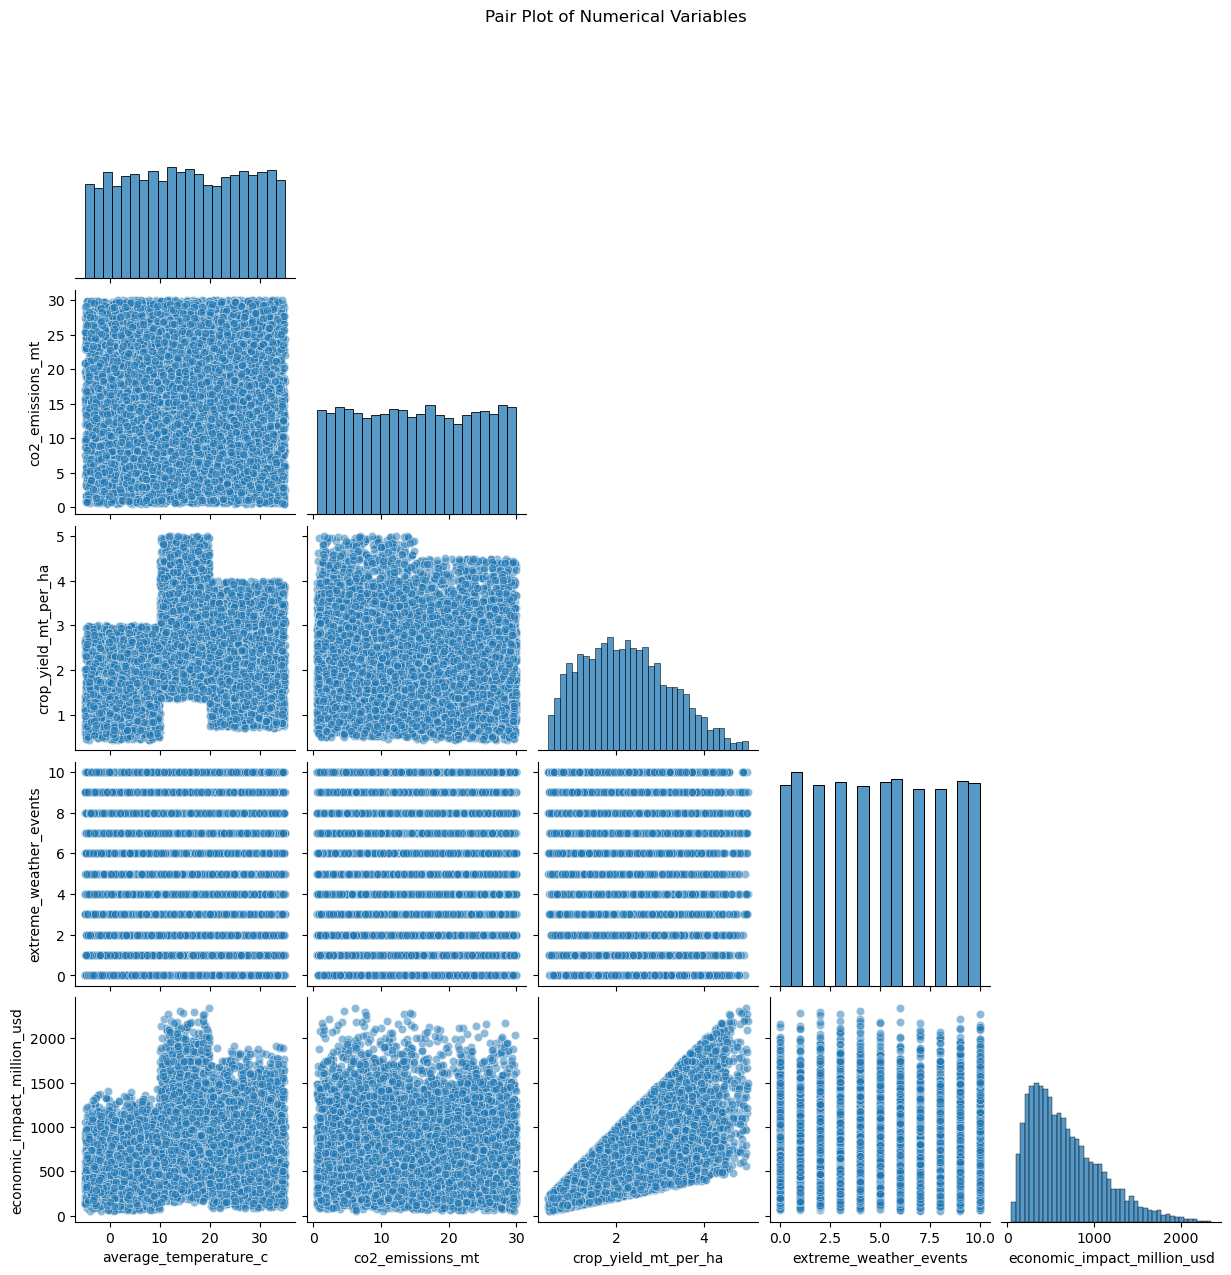

In [39]:
# Select relevant numerical columns
numerical_cols = [
    'average_temperature_c', 'co2_emissions_mt',
    'crop_yield_mt_per_ha', 'extreme_weather_events',
    'economic_impact_million_usd'
]
# Create pairplot
sns.pairplot(df[numerical_cols], corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pair_plot'))
# Show the plot
plt.show()

# 4. Categorical Plot

## a. Economic Impact by Crop Type

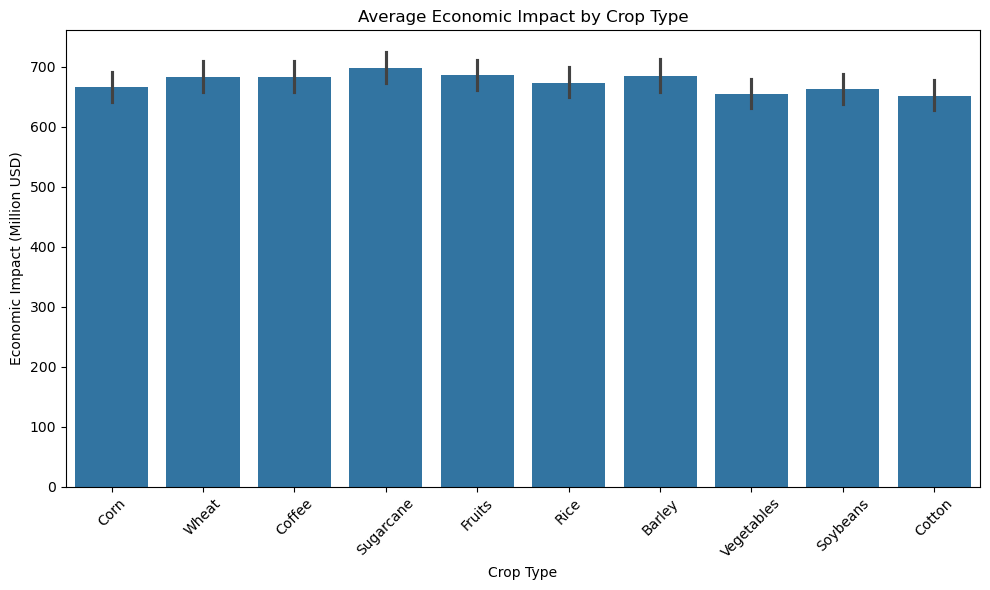

In [41]:
# Barplot: Economic Impact by Crop Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='crop_type', y='economic_impact_million_usd', estimator=np.mean)
plt.title('Average Economic Impact by Crop Type')
plt.xticks(rotation=45)
plt.ylabel('Economic Impact (Million USD)')
plt.xlabel('Crop Type')
plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Average_eco_impact_by_crope_type'))
# Show the plot
plt.show()

### Key Findings: Economic Impact by Crop Type

- **Sugarcane** has the highest economic impact among all crop types, significantly outperforming the others in terms of economic contribution.
  
- **Vegetables** exhibit the lowest economic impact compared to other crops, though they still exceed 600 million USD in economic impact.
  
- All crop types analyzed show an economic impact greater than **600 million USD**, indicating a general trend of agricultural activities having substantial economic value, regardless of the crop type.

- The wide variation in economic impact across crop types highlights that certain crops, like **sugarcane**, play a more significant role in driving economic outcomes, possibly due to factors like market demand, production scale, or export potential.


## b. Boxplot: Crop Yield by Country

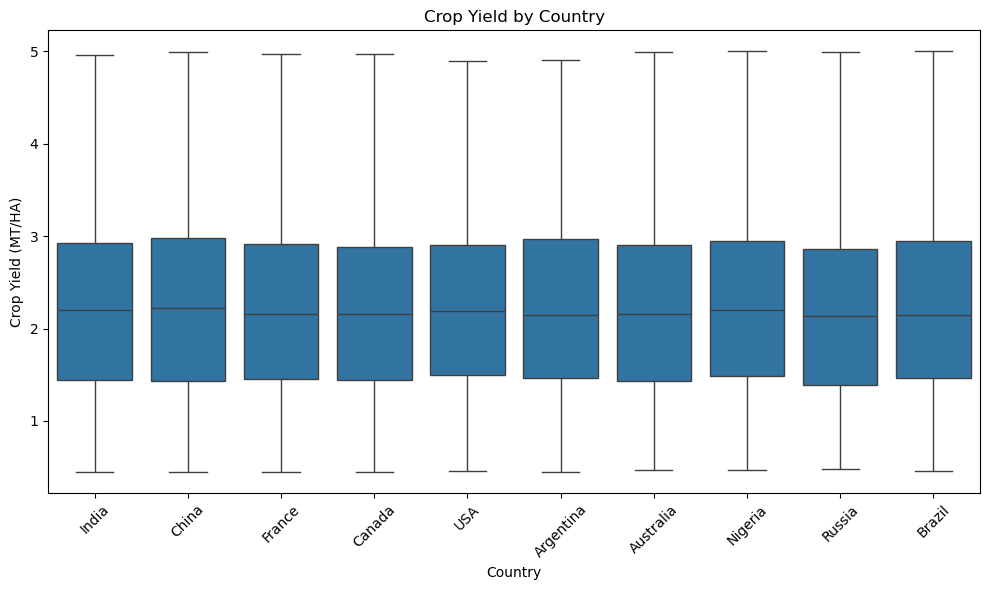

In [43]:
# Boxplot: Crop Yield by Country
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='country', y='crop_yield_mt_per_ha')
plt.title('Crop Yield by Country')
plt.xticks(rotation=45)
plt.ylabel('Crop Yield (MT/HA)')
plt.xlabel('Country')
plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'crop_yield_by_country'))
# Show the plot
plt.show()

### Key Findings: Crop Yield by Country

- The **crop yield** across all countries is consistently clustered between **1.5 and 3 MT/HA**.
  
- The **boxplots** show that the majority of countries have crop yields in the middle range, with few outliers indicating extreme values.

- The central positioning of the boxes suggests that most countries experience relatively similar crop yields, indicating a **moderate level of consistency** in agricultural productivity across countries.
  
- The **range between the minimum and maximum values** (1.5 to 3 MT/HA) further supports this consistency, as few countries fall outside of this range.

This indicates that while crop yields are generally moderate across countries, further analysis could explore what drives the **slight variations** in crop yields, such as regional farming practices or environmental factors.


## c. extreme_weather_events vs economic_impact_million_usd

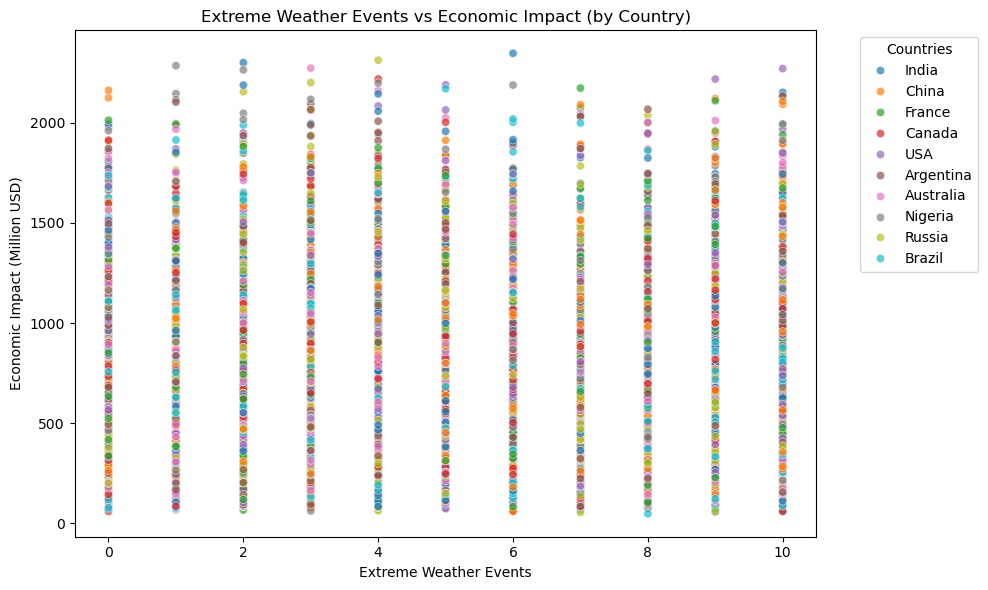

In [45]:
# Scatterplot: extreme_weather_events vs economic_impact_million_usd
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='extreme_weather_events', y='economic_impact_million_usd', hue='country', alpha=0.7)
plt.title('Extreme Weather Events vs Economic Impact (by Country)')
plt.xlabel('Extreme Weather Events')
plt.ylabel('Economic Impact (Million USD)')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')  # Right side
plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Extreme_weather_vc_eco_by_country'))
# Show the plot
plt.show()

## Key Finding: No Clear Relationship Between Extreme Weather Events and Economic Impact

The correlation between `extreme_weather_events` and `economic_impact_million_usd` is extremely weak (**-0.0045**), indicating virtually **no linear relationship** between the two variables.

A scatterplot of these variables, colored by country, reveals vertical clustering — suggesting that while the number of extreme weather events varies, the economic impact tends to cluster at specific values per country. 

→ This may imply that **economic impact is more influenced by country-specific factors** (e.g., crop yield) than the frequency of extreme weather events alone.

# 5. Key Questions Based on Correlation Matrix

Based on the correlation matrix and the findings, the most important questions are those involving variables with strong or moderate correlations. Below is a summary of the most relevant and data-supported questions:

## Most Important Questions

#### 1. How does average temperature affect crop yield across different countries and crop types?

#### 2. What is the relationship between extreme weather events and the economic impact on agriculture?

#### 3. How does crop yield influence the economic impact of agriculture?

#### 4. Which countries or regions are most affected by CO₂ emissions in terms of agricultural productivity?

# 6. Hypothesis

### 1. Higher crop yields are strongly associated with higher economic impact in agriculture.

### 2. Crop types like sugarcane have a significantly higher economic impact than crops like vegetables.

### 3. Crop yields are consistent across countries, with most showing similar levels of productivity.

### 4. Extreme weather events have a very weak negative impact on economic performance in agriculture.